In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

from IPython.display import clear_output

In [2]:
quantum_instance = QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024)

In [3]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [51]:
df1=df.loc[:50]
df1

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [52]:
X=df1.drop(['concrete_compressive_strength'],axis=1)
y=df1.concrete_compressive_strength

In [53]:
x=X.values
Y=y.values
Y

array([79.99, 61.89, 40.27, 41.05, 44.3 , 47.03, 43.7 , 36.45, 45.85,
       39.29, 38.07, 28.02, 43.01, 42.33, 47.81, 52.91, 39.36, 56.14,
       40.56, 42.62, 41.84, 28.24,  8.06, 44.21, 52.52, 53.3 , 41.15,
       52.12, 37.43, 38.6 , 55.26, 52.91, 41.72, 42.13, 53.69, 38.41,
       30.08, 37.72, 42.23, 36.25, 50.46, 43.7 , 39.  , 53.1 , 41.54,
       35.08, 15.05, 40.76, 26.26, 32.82, 39.78])

In [55]:
# construct QNN
regression_opflow_qnn = TwoLayerQNN(8,quantum_instance=quantum_instance)

In [56]:
# construct the regressor from the neural network
regressor = NeuralNetworkRegressor(neural_network=regression_opflow_qnn, 
                                   loss='l2', 
                                   optimizer=L_BFGS_B(),
                                   callback=callback_graph)

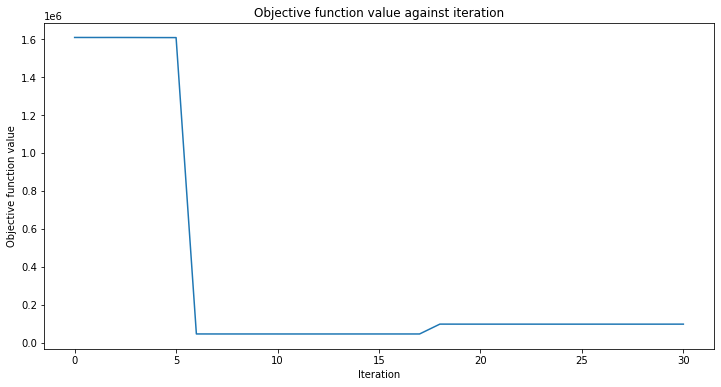

-14.72208360889807

In [57]:
# fit to data
regressor.fit(x, Y)


# score the result
regressor.score(x, Y)

In [69]:
vqr = VQR(ansatz=ansatz,
          optimizer=L_BFGS_B(),
          quantum_instance=quantum_instance,
          callback=callback_graph)

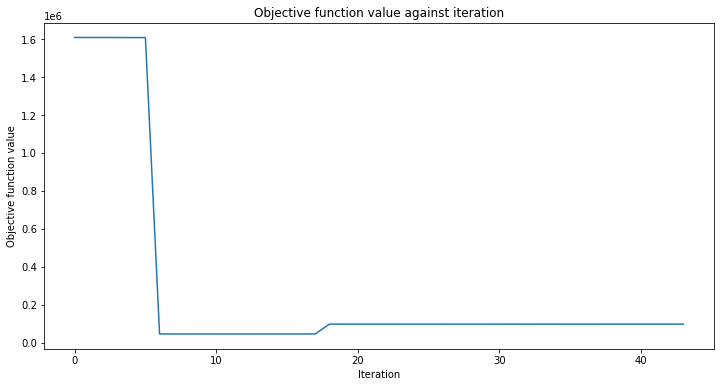

-14.743113941771806

In [71]:
# fit regressor
vqr.fit(x, Y)

# score result
vqr.score(x, Y)